In [1]:
# -*- encoding: utf-8 -*-
'''
file       :analysis.ipynb
Date       :2025/10/14 11:24:16
Email      :qiang.wang@stu.xidian.edu.cn
Author     :qwangxdu
'''

import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white", context="paper", palette="muted", rc={"font.family": "Times New Roman"})
plt.rcParams['font.family'] = 'Times New Roman'
import torch
from sklearn import preprocessing
from sklearn.manifold import TSNE

from datasets import SEEDFeatureDataset, SEEDIVFeatureDataset

def setup_seed(seed):  ## setup the random seed
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  # if you are using multi-GPU.
    np.random.seed(seed)  # Numpy module.
    random.seed(seed)  # Python random module.
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True
setup_seed(20)

In [97]:
data_path = "E:\\EEG_DataSets\\SEED\\ExtractedFeatures\\"
seed3_x, seed3_y, seed3_g = SEEDFeatureDataset(data_path).data()
seed3_y += 1
seed3_x = seed3_x.reshape(-1, 310)
seed3_t = seed3_g[:, 2]
seed3_s = seed3_g[:, 1]

seed4_path = "E:\\EEG_DataSets\\SEED_IV\\eeg_feature_smooth\\"
seed4_x, seed4_y, seed4_g = SEEDIVFeatureDataset(seed4_path).data()
seed4_x = seed4_x.reshape(-1, 310)
seed4_t = seed4_g[:, 2]
seed4_s = seed4_g[:, 1]

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
for i in np.unique(seed4_s):
    seed4_x[seed4_s == i] = min_max_scaler.fit_transform(seed4_x[seed4_s == i])

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
for i in np.unique(seed3_s):
    seed3_x[seed3_s == i] = min_max_scaler.fit_transform(seed3_x[seed3_s == i])

In [98]:
# For SEED session 1 subject 1
seed3_sub1_x = seed3_x[seed3_s == 1]
seed3_sub1_y = seed3_y[seed3_s == 1]
seed3_sub1_t = seed3_t[seed3_s == 1]

# For SEED-IV session 1 subject 5
seed4_sub5_x = seed4_x[seed4_s == 5]
seed4_sub5_y = seed4_y[seed4_s == 5]
seed4_sub5_t = seed4_t[seed4_s == 5]

In [99]:
def t_sne(x):
    tsne = TSNE(n_components=2, random_state=20)
    x_tsne = tsne.fit_transform(x)
    return x_tsne

In [100]:
seed3 = t_sne(seed3_sub1_x)
seed4 = t_sne(seed4_sub5_x)

In [109]:
# Only Positive samples
seed3_y1_x = seed3[seed3_sub1_y == 1]
seed4_y0_x = seed4[seed4_sub5_y == 0]
seed3_y1_t = seed3_sub1_t[seed3_sub1_y == 1]
seed4_y0_t = seed4_sub5_t[seed4_sub5_y == 0]

In [110]:
def sample_indices(data, ratio=0.2, random_state=42):
    np.random.seed(random_state)
    N = len(data)
    sample_size = int(N * ratio)
    sampled_idx = np.random.choice(np.arange(N), sample_size, replace=False)
    return sampled_idx
sampled_idx_seed3_y1 = sample_indices(seed3_y1_x, ratio=0.2, random_state=42)
seed3_y1_x_sample = seed3_y1_x[sampled_idx_seed3_y1]
seed3_y1_t_sample = seed3_y1_t[sampled_idx_seed3_y1]

# 对 seed4 进行 20% 随机采样
# sampled_idx_seed4 = sample_indices(seed4, ratio=0.1, random_state=42)
# seed4_sample = seed4[sampled_idx_seed4]
# seed4_sub5_y_sample = seed4_sub5_y[sampled_idx_seed4]
# seed4_sub5_t_sample = seed4_sub5_t[sampled_idx_seed4]

In [113]:
colors = [    
    "#FF5733",  # 红色
    "#33FF57",  # 绿色
    "#3357FF",  # 蓝色
    "#FFEB33",  # 黄色
    "#FF9F33",  # 橙色
    "#9B33FF",  # 紫色
]

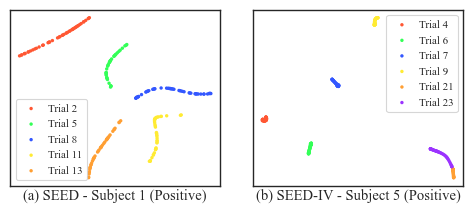

In [283]:
# 推荐的学术论文单栏图设置

fig, axes = plt.subplots(1, 2, figsize=(5, 2.2))
axes = axes.flatten()
plt.subplots_adjust(bottom=0.2)
seed3_labels = ["Trial {}".format(t) for t in np.unique(seed3_y1_t_sample)]
for i, t in enumerate(np.unique(seed3_y1_t_sample)):
    axes[0].scatter(seed3_y1_x_sample[seed3_y1_t_sample == t, 0], 
                   seed3_y1_x_sample[seed3_y1_t_sample == t, 1], 
                   color=colors[i], label=seed3_labels[i], 
                   s=6, edgecolors='none') 

# Legend 设置
axes[0].legend(loc='best', fontsize=8, markerscale=1.0, 
              frameon=True, fancybox=True, shadow=False,
              columnspacing=1.0, handletextpad=0.5)

# 设置坐标轴
axes[0].set_xticks([])
axes[0].set_yticks([])

seed4_labels = ["Trial {}".format(t) for t in np.unique(seed4_y0_t)]
for i, t in enumerate(np.unique(seed4_y0_t)):
    axes[1].scatter(seed4_y0_x[seed4_y0_t == t, 0], 
                   seed4_y0_x[seed4_y0_t == t, 1], 
                   color=colors[i], label=seed4_labels[i], 
                   s=6, edgecolors='none') 

# Legend 设置
axes[1].legend(loc='best', fontsize=8, markerscale=1.0, 
              frameon=True, fancybox=True, shadow=False,
              columnspacing=1.0, handletextpad=0.5)

axes[1].set_xticks([])
axes[1].set_yticks([])

axes[0].text(0.5, -0.08, '(a) SEED - Subject 1 (Positive)', 
            transform=axes[0].transAxes, ha='center', fontsize=10.5)
axes[1].text(0.5, -0.08, '(b) SEED-IV - Subject 5 (Positive)', 
            transform=axes[1].transAxes, ha='center', fontsize=10.5)
plt.tight_layout()
plt.savefig("01_tsne_seed3_seed4_positive.png", bbox_inches='tight', dpi=400)  

In [163]:
### 对不同聚类算法的对比

In [164]:
seed3_sub1_x = seed3_x[seed3_s == 1]
seed3_sub1_y = seed3_y[seed3_s == 1]
seed3_sub1_t = seed3_t[seed3_s == 1]

In [173]:
from sklearn.metrics import normalized_mutual_info_score
from sklearn.cluster import KMeans, AgglomerativeClustering, KMeans, DBSCAN, OPTICS

In [174]:

# 通过NMI确定最优的参数
best_nmi = -1
best_k = None
best_labels = None

# 尝试不同的聚类数
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(seed3_sub1_x)
    # NMI 与真实标签 seed4_sub5_y_sample
    nmi = normalized_mutual_info_score(seed3_sub1_t, cluster_labels)
    # print(f"K={k}, NMI={nmi:.4f}")
    if nmi > best_nmi:
        best_nmi = nmi
        best_k = k
        best_labels = cluster_labels

print(f"Best K: {best_k}, NMI: {best_nmi:.4f}")

Best K: 18, NMI: 0.8726


In [177]:


# 通过NMI确定最优的参数
best_nmi = -1
best_k = None
best_labels = None

# 尝试不同的聚类数
for k in range(2, 20):
    kmeans = AgglomerativeClustering(n_clusters=k)
    cluster_labels = kmeans.fit_predict(seed3_sub1_x)
    # NMI 与真实标签 seed4_sub5_y_sample
    nmi = normalized_mutual_info_score(seed3_sub1_t, cluster_labels)
    # print(f"K={k}, NMI={nmi:.4f}")
    if nmi > best_nmi:
        best_nmi = nmi
        best_k = k
        best_labels = cluster_labels

print(f"Best K: {best_k}, NMI: {best_nmi:.4f}")

Best K: 19, NMI: 0.9180


In [191]:
best_nmi = -1
best_min_samples = None
best_labels = None

# 尝试不同的 min_samples 参数
for min_samples in range(3, 20):
    optics = OPTICS(min_samples=min_samples)
    cluster_labels = optics.fit_predict(seed3_sub1_x)
    nmi = normalized_mutual_info_score(seed3_sub1_t, cluster_labels)
    if nmi > best_nmi:
        best_nmi = nmi
        best_min_samples = min_samples
        best_labels = cluster_labels

print(f"Best min_samples: {best_min_samples}, NMI: {best_nmi:.4f}")

Best min_samples: 18, NMI: 0.5411


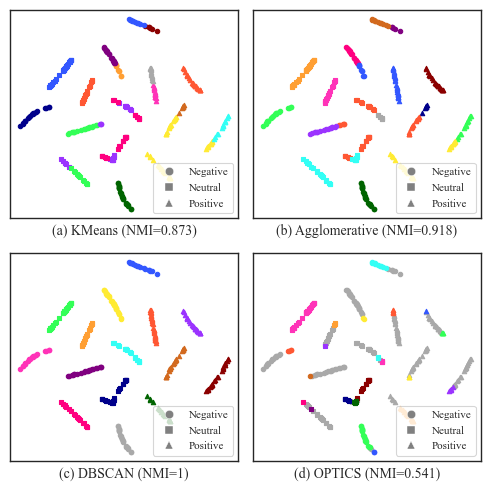

In [285]:

# Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, init="pca", perplexity = 50, random_state=42)
data_2d = tsne.fit_transform(seed3_sub1_x)

# Create subplots for visualization
from matplotlib.lines import Line2D
# Define clustering methods
clustering_methods = {
    "(a) KMeans (NMI=0.873)": KMeans(n_clusters=18, random_state=42),
    "(b) Agglomerative (NMI=0.918)": AgglomerativeClustering(n_clusters=19),
    "(c) DBSCAN (NMI=1)": DBSCAN(eps=1, min_samples=5),
    "(d) OPTICS (NMI=0.541)": OPTICS(min_samples=18),
}
labels = ["Negative", "Neutral", "Positive"]
sample_size = int(data_2d.shape[0] * 0.1)
np.random.seed(42)  # For reproducibility
sampled_indices = np.random.choice(np.arange(data_2d.shape[0]), sample_size, replace=False)

fig, axes = plt.subplots(2, 2, figsize=(5, 5))
fig.subplots_adjust(wspace=0.15, hspace=0.2)  # Adjust spacing between subplots
# Define 15 distinguishable colors
colors = [
    "#FF5733",  # 红色
    "#33FF57",  # 绿色
    "#3357FF",  # 蓝色
    "#FFEB33",  # 黄色
    "#FF9F33",  # 橙色
    "#9B33FF",  # 紫色
    "#FF33B8",  # 粉色
    "#33FFF5",  # 青色
    "#8B0000",  # 深红色
    "#006400",  # 深绿色
    "#00008B",  # 深蓝色
    "#800080",  # 深紫色
    "#FF0080",  # 橙黄色
    "#D2691E",  # 巧克力色
    "#A9A9A9"   # 深灰色
]

legend_elements = [
    Line2D([0], [0], marker=markers[i], color='w', 
           markerfacecolor='gray', markersize=6, 
           markeredgecolor='white', markeredgewidth=0.3,
           label=labels[i], linestyle='None') 
    for i in range(3)
]

for ax, (name, method) in zip(axes.flatten(), clustering_methods.items()):
    clusters = method.fit_predict(seed3_sub1_x)
    unique_clusters = np.unique(clusters)
    # print(len(unique_clusters))
    sample_x = data_2d[sampled_indices]
    sample_c = clusters[sampled_indices]
    sample_y = seed3_sub1_y[sampled_indices]
    markers = ['o', 's', '^']  # Define markers for different sample_y values
    for cluster in unique_clusters:  
        cluster_indices = np.where(sample_c == cluster)
        for y_value in np.unique(sample_y[cluster_indices]):
            y_indices = np.where(sample_y[cluster_indices] == y_value)
            ax.scatter(
                sample_x[cluster_indices][y_indices, 0], 
                sample_x[cluster_indices][y_indices, 1], 
                facecolors=colors[cluster % len(colors)], 
                # linewidths=0.2,  # Set the edge thickness
                s=10, 
                marker=markers[y_value % len(markers)],
            )
    ax.legend(handles=legend_elements, loc='lower right', fontsize=8)
    ax.set_xlabel(name, fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.savefig('02_Capture_Intra-individual.png', dpi=300, bbox_inches='tight')

In [2]:
import os
import re

In [4]:
seed_dirs = [
    r'.\\logs\\seed3_1_none',
    r'.\\logs\\seed3_2_none',
    r'.\\logs\\seed3_3_none'
]

method_acc_dict = {}
for root_dir in seed_dirs:
    # average_last_value = []
    for folder in os.listdir(root_dir):
        folder_path = os.path.join(root_dir, folder)
        
        mean_acc_path = os.path.join(folder_path, 'mean_acc.txt')
        if os.path.exists(mean_acc_path):
            with open(mean_acc_path, 'r', encoding='gbk') as f:
                for line in f:
                    match = re.search(r'target:\s*([\d\.]+), best_acc:\s*([\d\.]+)', line)
                    if match:
                        subject_id = int(match.group(1))
                        best_acc = float(match.group(2))
                        # print(f"Subject ID: {subject_id}, Best Acc: {best_acc:.2f}, Time: {time_sec:.2f}s")
                        method_acc_dict.setdefault(folder, []).append(best_acc)
for method, accs in method_acc_dict.items():
    accs = np.array(accs)
    session1_acc = accs[:15]
    session2_acc = accs[15:30] if len(accs) > 15 else np.array([])
    session3_acc = accs[-15:] if len(accs) > 30 else np.array([])
    print(f"{method}: {np.mean(accs):.2f} / {np.std(accs):05.2f}  ({np.mean(session1_acc):.2f}/{np.std(session1_acc):05.2f}, {np.mean(session2_acc):.2f}/{np.std(session2_acc):05.2f}, {np.mean(session3_acc):.2f}/{np.std(session3_acc):05.2f})")


DBPM: 94.86 / 06.43  (95.42/06.05, 94.66/06.03, 94.51/07.10)
WithOutPLLoss: 85.59 / 06.99  (87.70/04.77, 83.80/08.35, 85.28/06.83)
WithOutPM: 86.32 / 08.41  (88.46/05.66, 83.69/10.00, 86.80/08.28)
WithOutPretrain: 93.09 / 07.86  (92.36/07.16, 93.15/06.83, 93.75/09.30)
WithOutSSTS: 88.80 / 07.69  (91.11/05.06, 85.51/08.61, 89.77/07.78)
WithOutTransferLoss: 83.83 / 09.46  (84.92/04.30, 84.79/08.79, 81.76/12.89)


In [6]:
seed_dirs = [
    r'.\\logs\\seed4_1_none',
    r'.\\logs\\seed4_2_none',
    r'.\\logs\\seed4_3_none'
]

method_acc_dict = {}
for root_dir in seed_dirs:
    # average_last_value = []
    for folder in os.listdir(root_dir):
        folder_path = os.path.join(root_dir, folder)
        
        mean_acc_path = os.path.join(folder_path, 'mean_acc.txt')
        if os.path.exists(mean_acc_path):
            with open(mean_acc_path, 'r', encoding='gbk') as f:
                for line in f:
                    match = re.search(r'target:\s*([\d\.]+), best_acc:\s*([\d\.]+)', line)
                    if match:
                        subject_id = int(match.group(1))
                        best_acc = float(match.group(2))
                        # print(f"Subject ID: {subject_id}, Best Acc: {best_acc:.2f}, Time: {time_sec:.2f}s")
                        method_acc_dict.setdefault(folder, []).append(best_acc)
for method, accs in method_acc_dict.items():
    accs = np.array(accs)
    session1_acc = accs[:15]
    session2_acc = accs[15:30] if len(accs) > 15 else np.array([])
    session3_acc = accs[-15:] if len(accs) > 30 else np.array([])
    print(f"{method}: {np.mean(accs):.2f} / {np.std(accs):05.2f}  ({np.mean(session1_acc):.2f}/{np.std(session1_acc):05.2f}, {np.mean(session2_acc):.2f}/{np.std(session2_acc):05.2f}, {np.mean(session3_acc):.2f}/{np.std(session3_acc):05.2f})")

DBPM: 78.90 / 09.71  (76.39/10.51, 80.54/08.97, 79.76/09.08)
WithOutPLLoss: 78.06 / 10.16  (74.91/09.85, 79.90/10.04, 79.36/09.84)
WithOutPM: 75.27 / 10.67  (72.90/09.32, 77.74/09.38, 75.17/12.44)
WithOutPretrain: 77.48 / 10.33  (75.81/09.94, 79.56/09.21, 77.07/11.36)
WithOutSSTS: 74.21 / 10.82  (71.24/11.34, 75.73/08.78, 75.65/11.51)
WithOutTransferLoss: 70.92 / 11.10  (69.90/10.94, 71.36/09.78, 71.51/12.34)
